In this notebook, we'll use multiple datasets to create ML model using the KNN (k-nearest neighbor) algorithm for both classification and regression tasks.

In [292]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)

In [343]:
df = sns.load_dataset('iris')
df.to_csv('/content/iris.csv', index = False)

# Classification Task

## Using Iris dataset (single class)
As all the independent features of this dataset as numerical.

### Date Preprocessing

In [293]:
# loading the dataset and having a look
df = sns.load_dataset('iris')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [294]:
# seeing the number of categories and their frequecy in the target feature i.e. species
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [295]:
# doing one hot encoding and keeping only 1 column for target prediction
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 0, 'virginica': 1}).astype(int)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [296]:
df['species'].value_counts()

species
0    100
1     50
Name: count, dtype: int64

Now we've target feature that contains 0 (if the flower is of type setosa) and 1 (if the flower is of type versicolor).

In [297]:
# As some of the values are bigger and some are smaller (not the only reason), so scaling the dataset to have a mean of 0 and std of 1
from sklearn.preprocessing import StandardScaler
# creating instance
scaler = StandardScaler()
# transforming the independent features
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# displaying the head of the data
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0


Now, the data is ready for the model.

In [298]:
# doing the train, test split (required for evaluation)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('species', axis = 1), df['species'], test_size = 0.33, random_state = 20)

In [299]:
# just having a look at the splitted data
y_train

132    1
148    1
31     0
100    1
62     0
      ..
22     0
75     0
137    1
15     0
99     0
Name: species, Length: 100, dtype: int64

### Model training and evaluation using n_neighbors = 1

#### Training and Testing using n_neighbors = 1

In [300]:
# importing algorithm
from sklearn.neighbors import KNeighborsClassifier
# initializing the model using n_neighbors (k) as 1
model = KNeighborsClassifier(n_neighbors = 1)
# training the model
model.fit(x_train, y_train)
# making predictions
y_pred = model.predict(x_test)

In [301]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

#### Evaluation

In [302]:
# importing libraries
from sklearn.metrics import classification_report, confusion_matrix

# printing confusion_matrix
print('Confusion Matrix \n', confusion_matrix(y_test, y_pred))

# printing classification_report
print('\n Classification Report \n', classification_report(y_pred,y_test))

Confusion Matrix 
 [[34  1]
 [ 4 11]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.73      0.92      0.81        12

    accuracy                           0.90        50
   macro avg       0.85      0.91      0.87        50
weighted avg       0.91      0.90      0.90        50



In [303]:
error_rate = []
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  residue_mean = np.mean(y_pred != y_test)
  error_rate.append(residue_mean)


### Model training and evaluation using n_neighbors range i.e. 1-40

#### Training and Testing using n_neighbors range i.e. 1-40

Text(0.5, 1.0, 'Model error rate relationship with no. of neighbors')

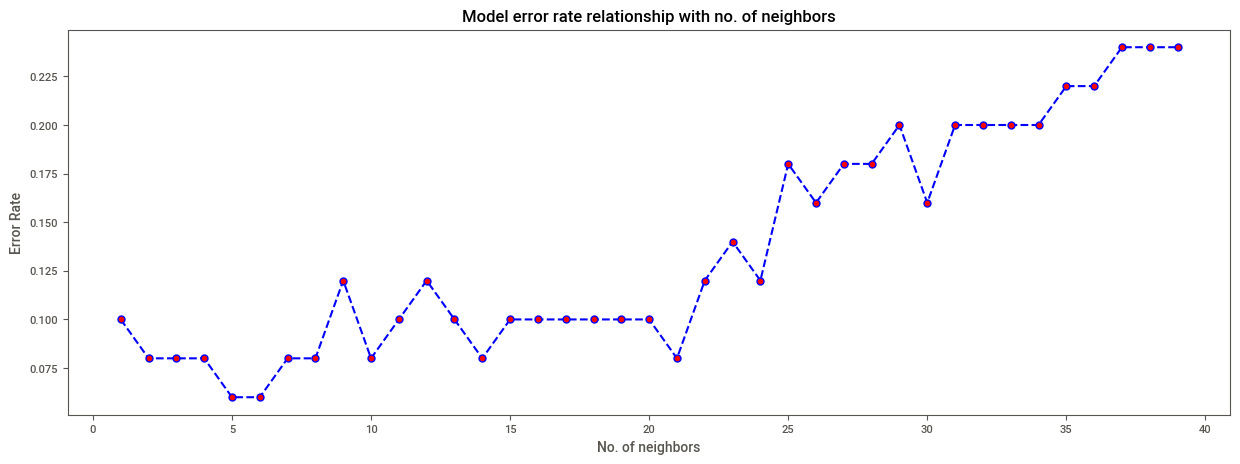

In [304]:
# visulaizing the results
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = '5')
plt.xlabel('No. of neighbors')
plt.ylabel('Error Rate')
plt.title('Model error rate relationship with no. of neighbors')

As we can see when the n_neighbours was 5, the error rate was the least. So this is a good value for the n_neighbors.

#### Training and Testing using n_neighbors = 5

In [305]:
# importing algorithm
from sklearn.neighbors import KNeighborsClassifier
# initializing the model using n_neighbors (k) as 1
model = KNeighborsClassifier(n_neighbors = 5)
# training the model
model.fit(x_train, y_train)
# making predictions
y_pred = model.predict(x_test)

In [306]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0])

#### Evaluation

In [307]:
# importing libraries
from sklearn.metrics import classification_report, confusion_matrix

# printing confusion_matrix
print('Confusion Matrix \n', confusion_matrix(y_test, y_pred))

# printing classification_report
print('\n Classification Report \n', classification_report(y_pred,y_test))

Confusion Matrix 
 [[35  0]
 [ 3 12]]

 Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.80      1.00      0.89        12

    accuracy                           0.94        50
   macro avg       0.90      0.96      0.92        50
weighted avg       0.95      0.94      0.94        50



So, here is increased performance.

# Regression Task

## Using Weather History Dataset
The dataset has both categorical and numerical features.
The dataset is huge and can be downloaded from here: https://www.kaggle.com/datasets/rafunlearnhub/weatherhistory

### Preprocessing

In [308]:
!pip install sweetviz --quiet
import sweetviz as sv

In [309]:
# loading the dataset
df = pd.read_csv('/content/weather-history.csv')
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


#### EDA

                                             |          | [  0%]   00:00 -> (? left)


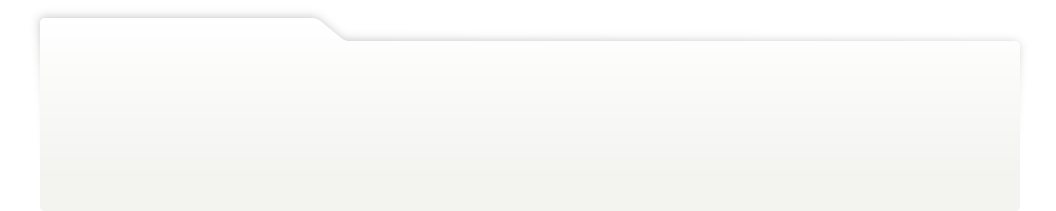
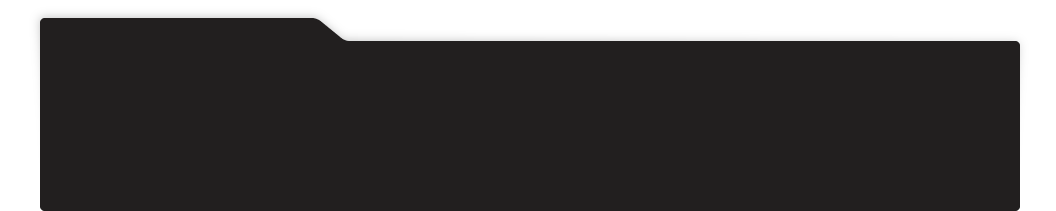
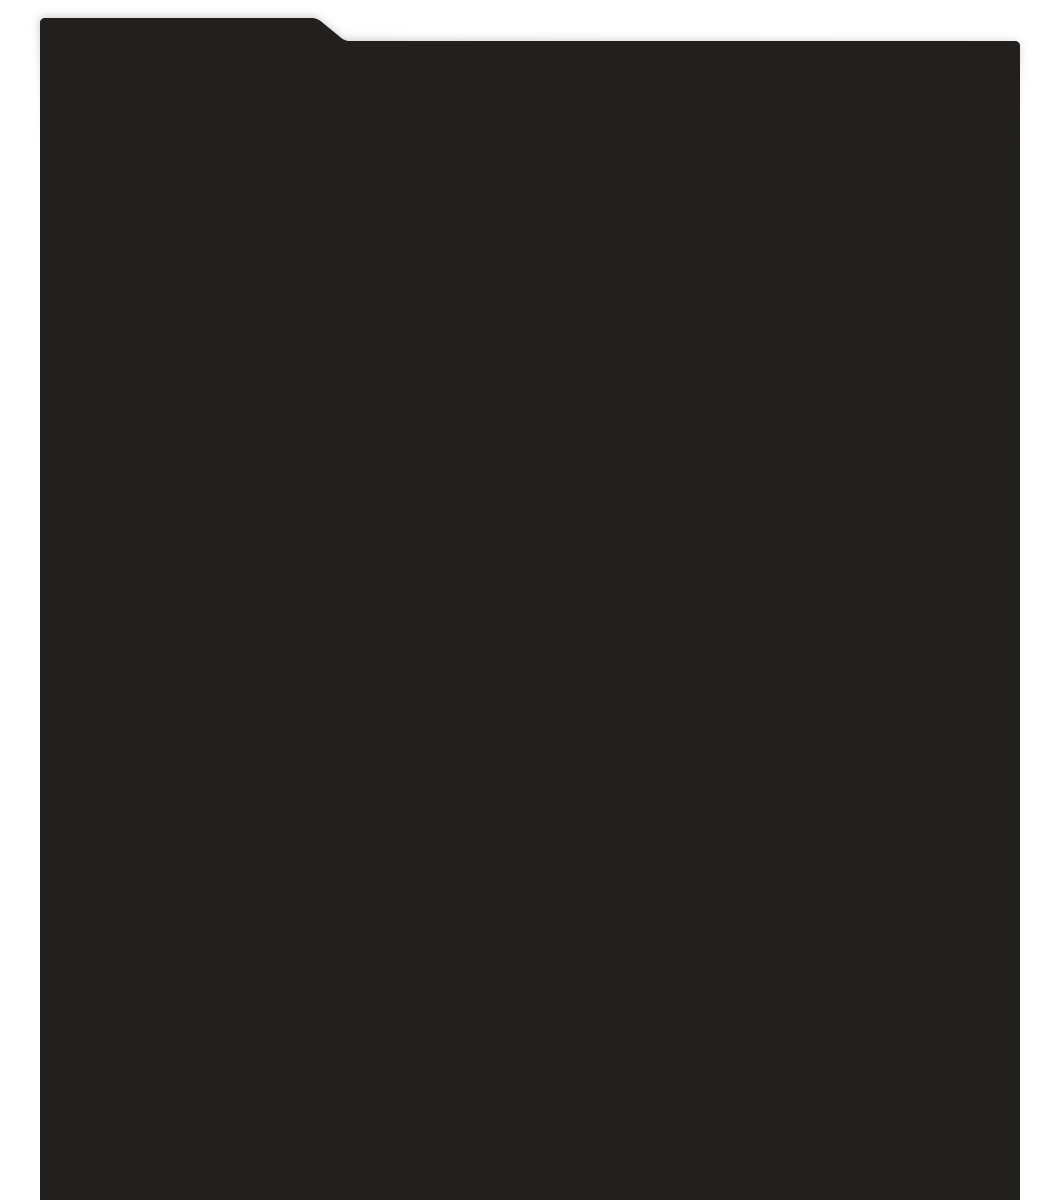
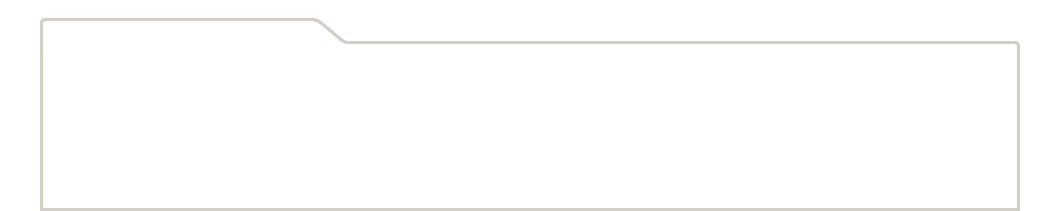
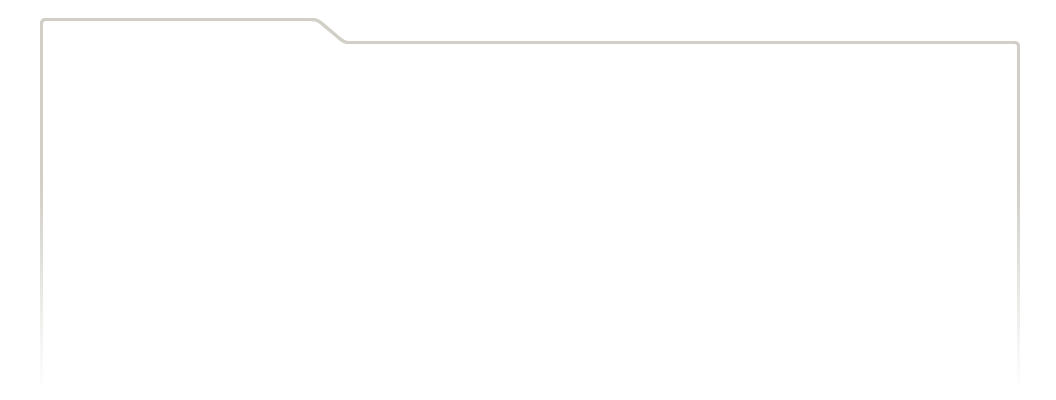
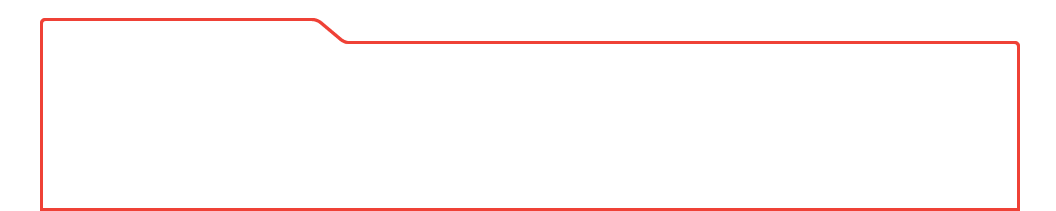
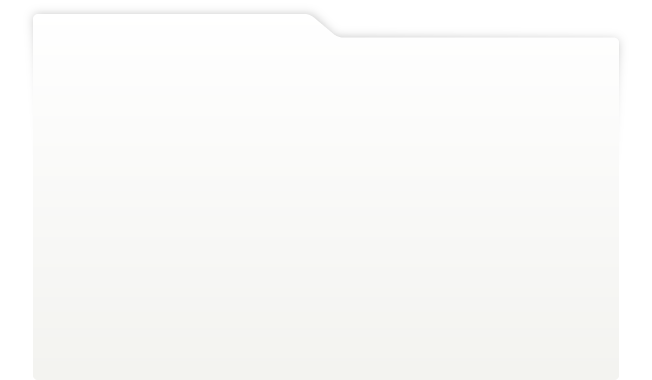
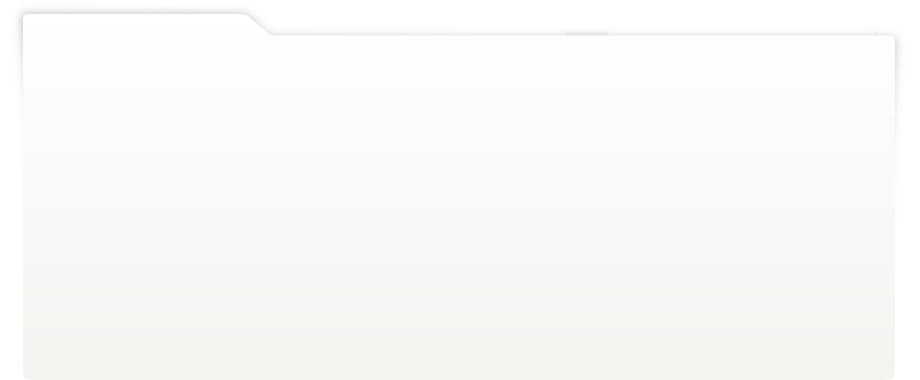
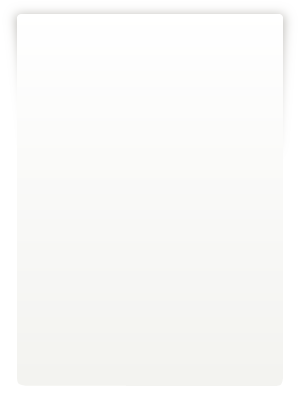
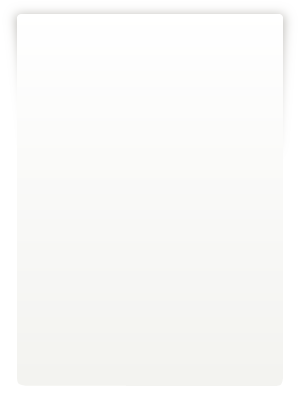
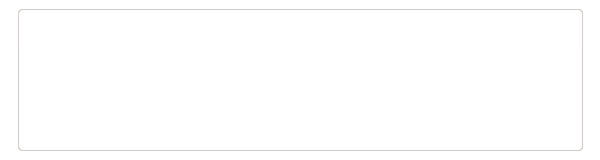
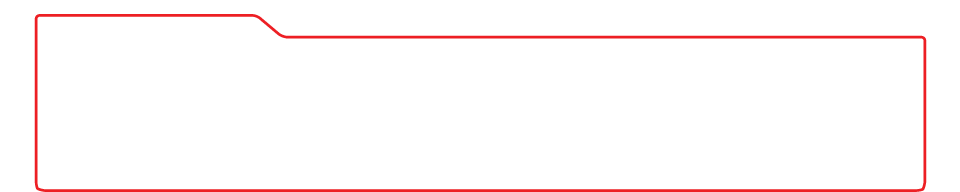
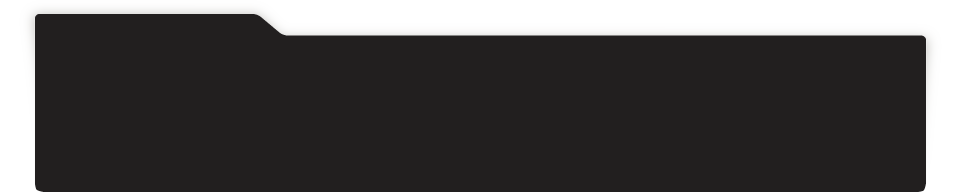
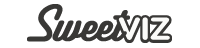
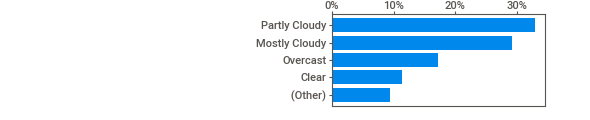
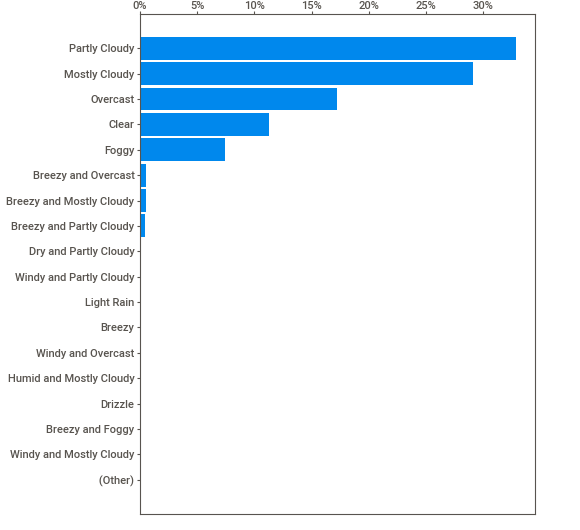
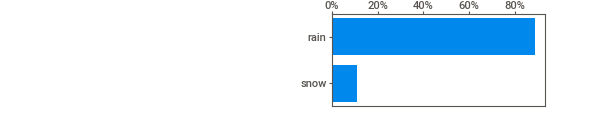
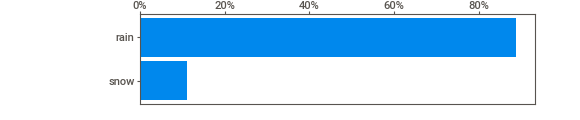
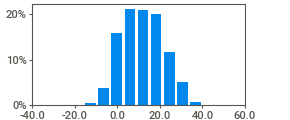
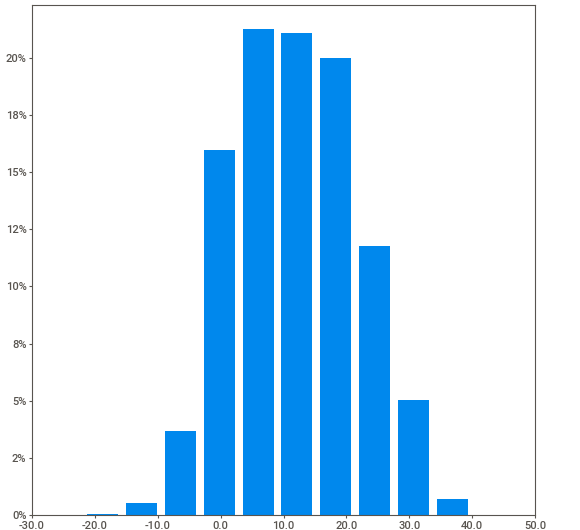
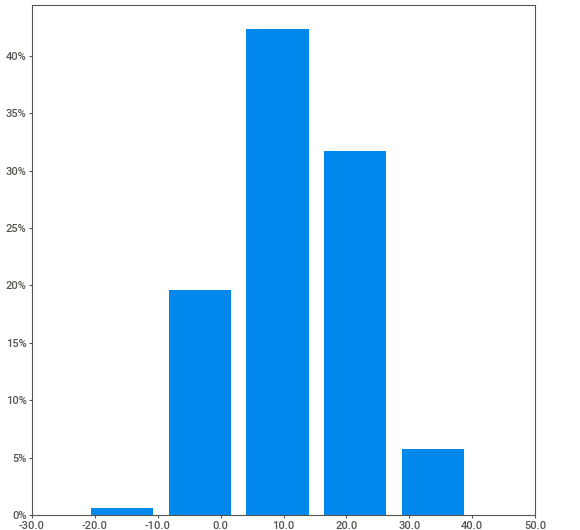
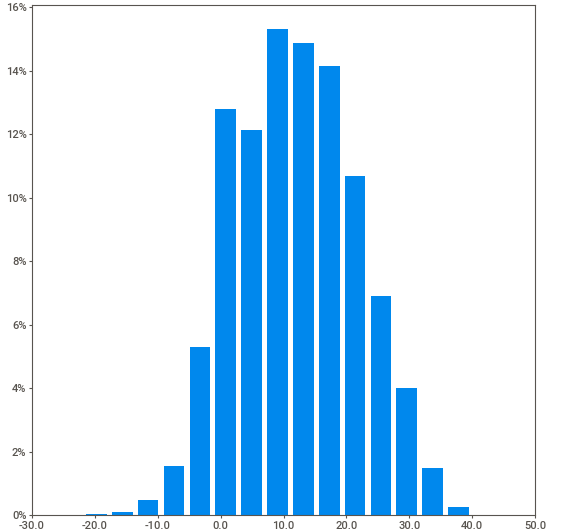
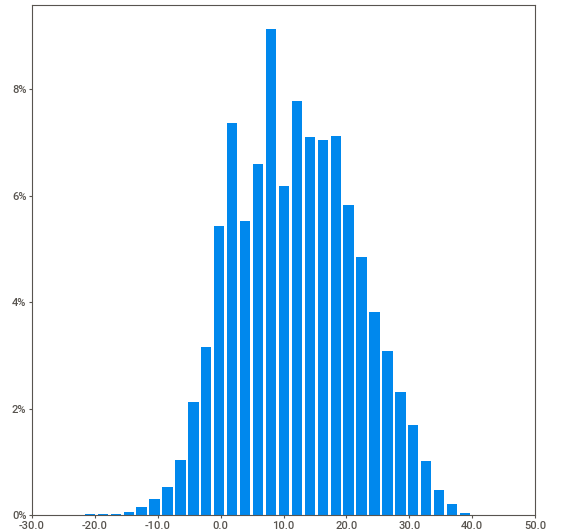
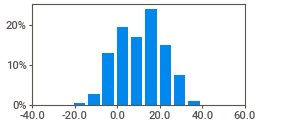
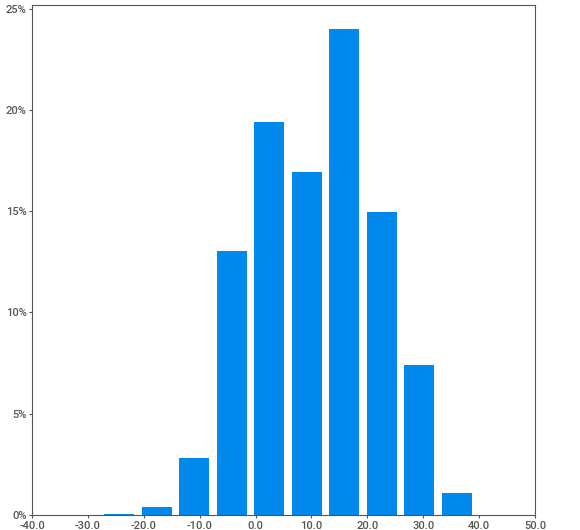
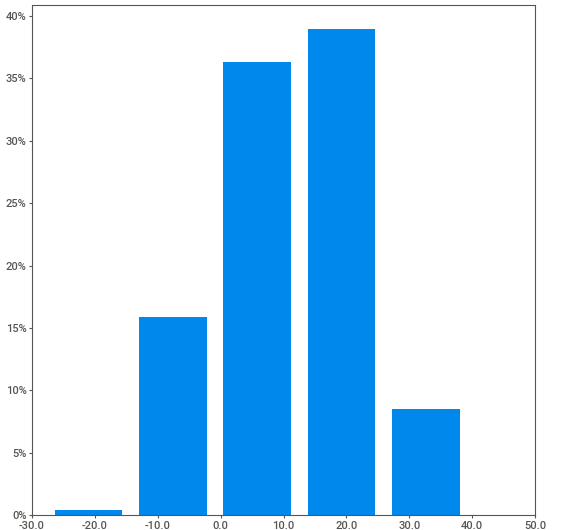
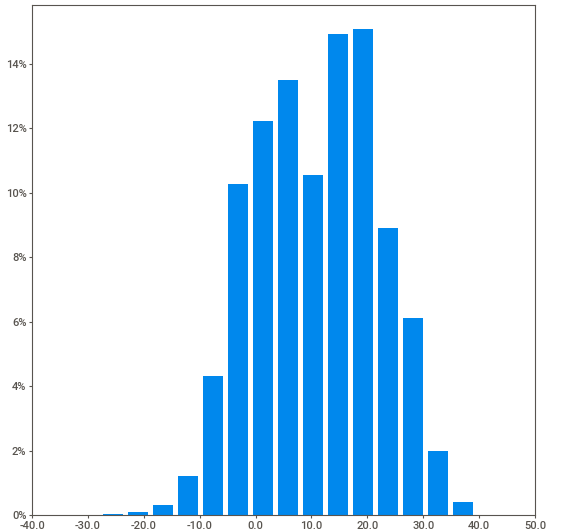
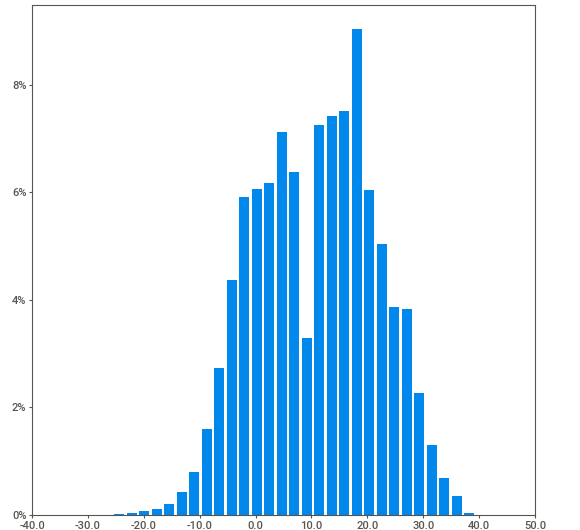
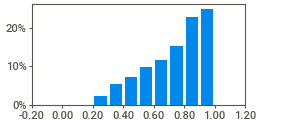
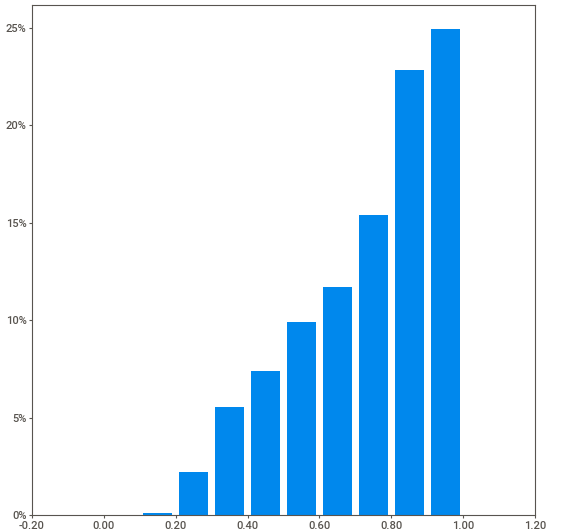
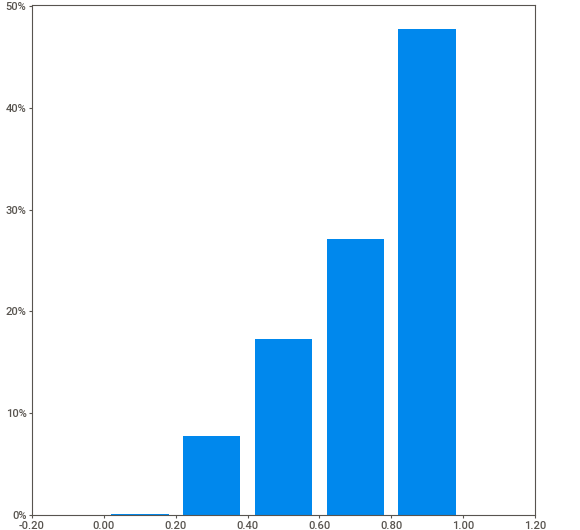
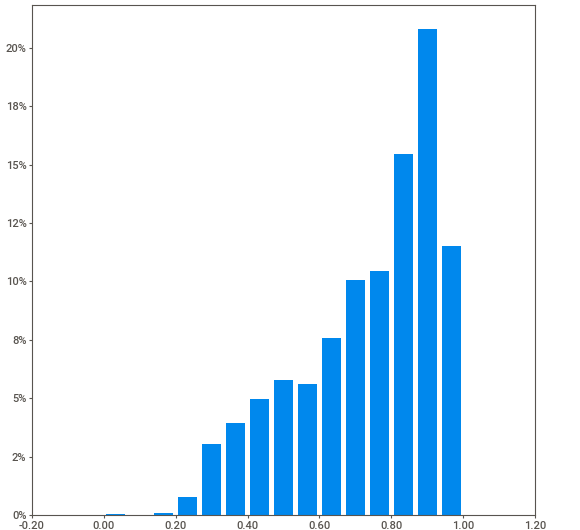
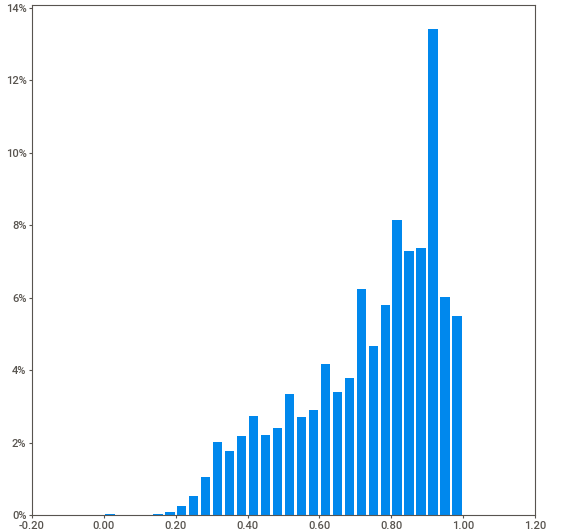
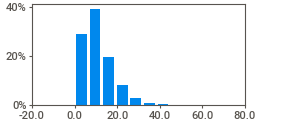
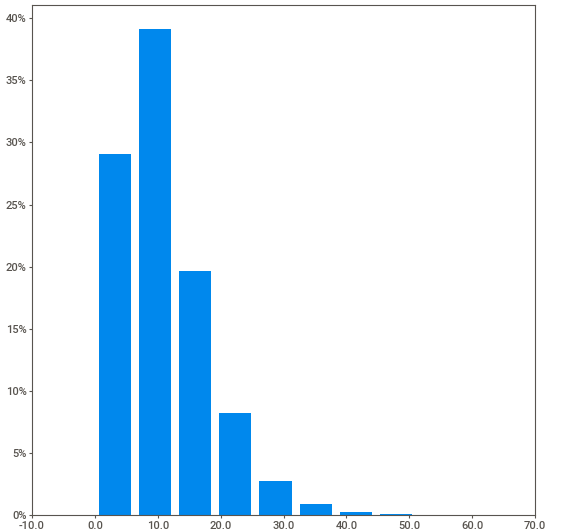
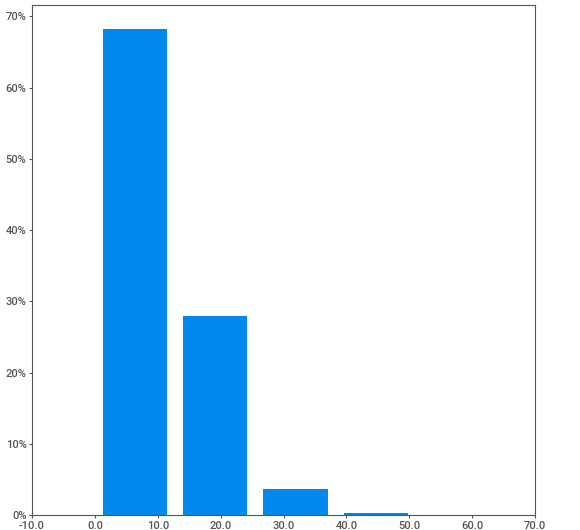
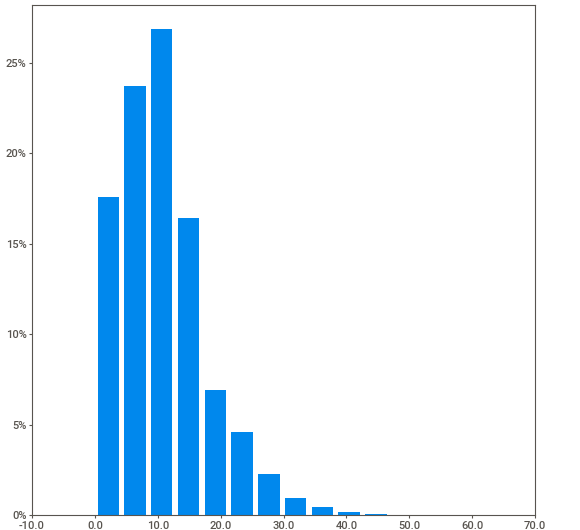
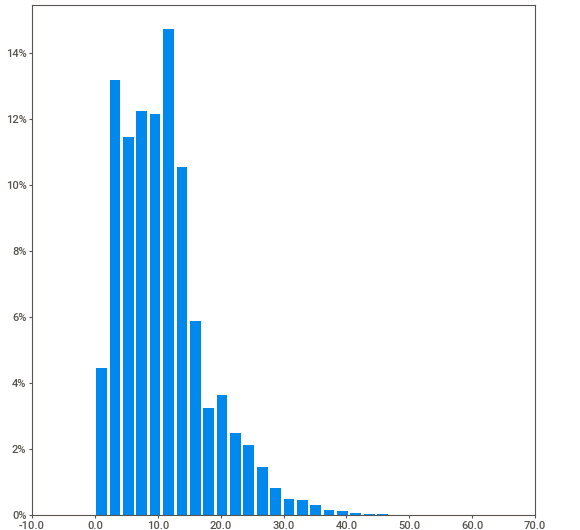
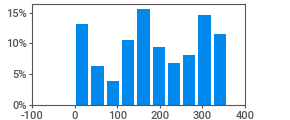
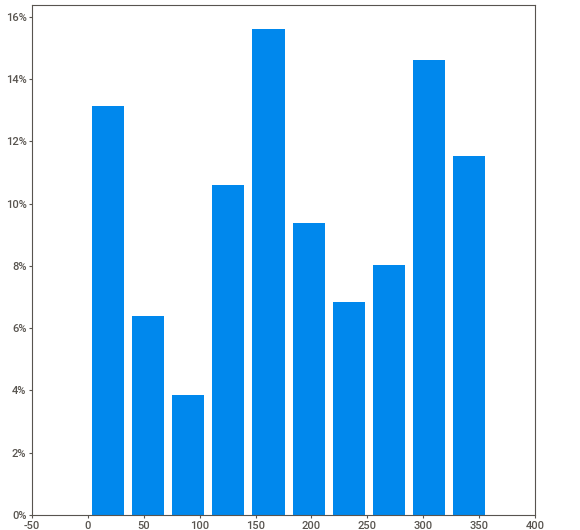
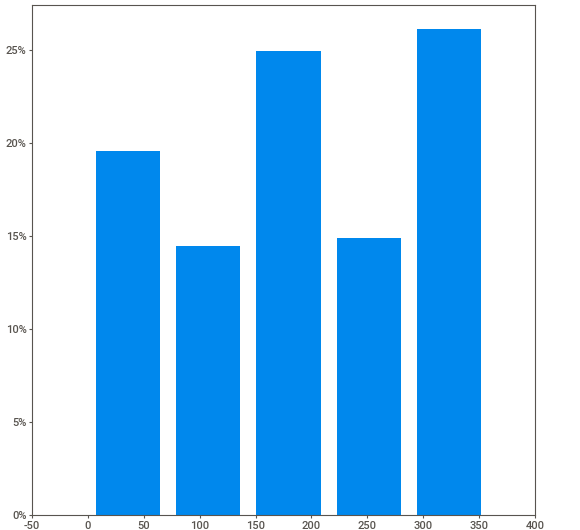
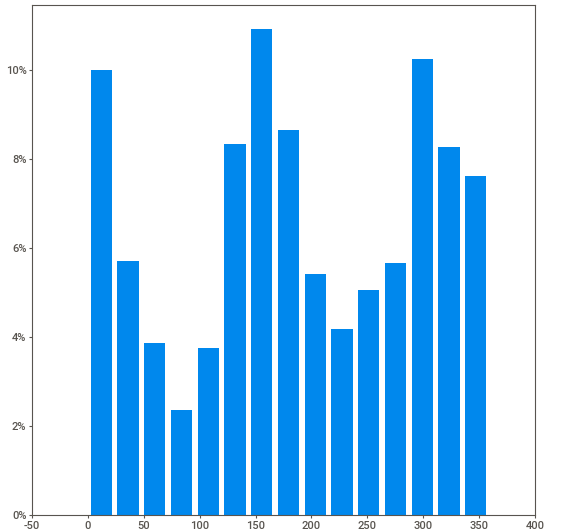
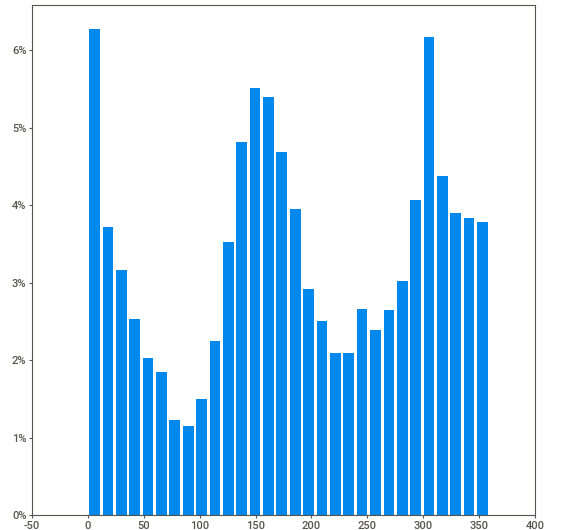
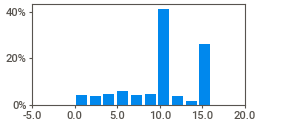
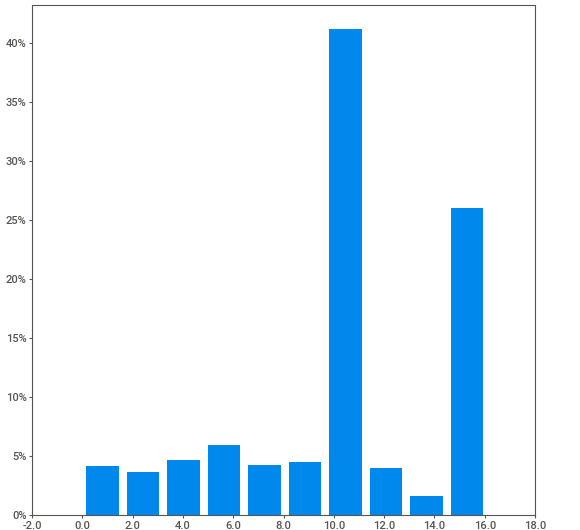
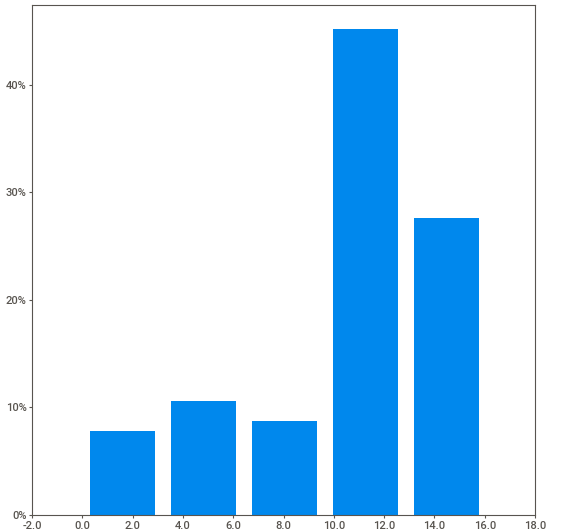
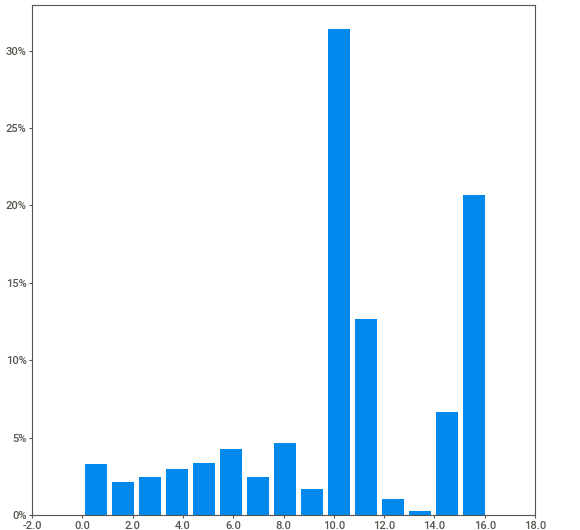
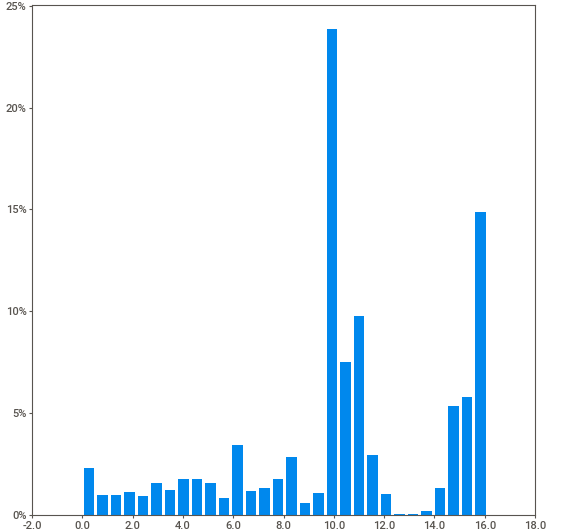
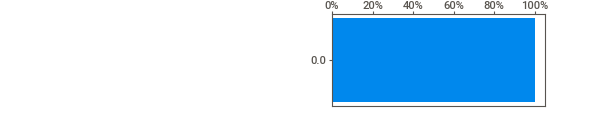
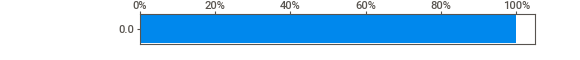
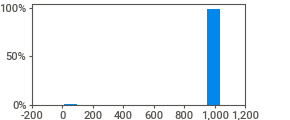
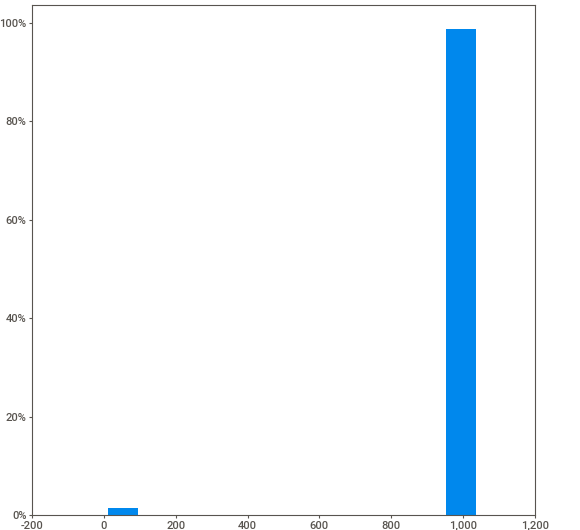
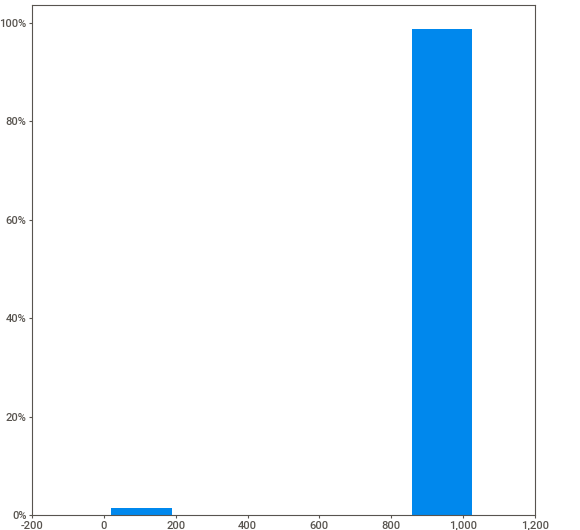
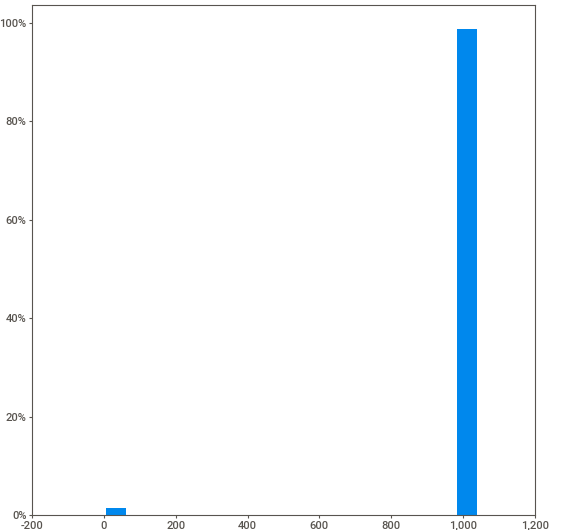
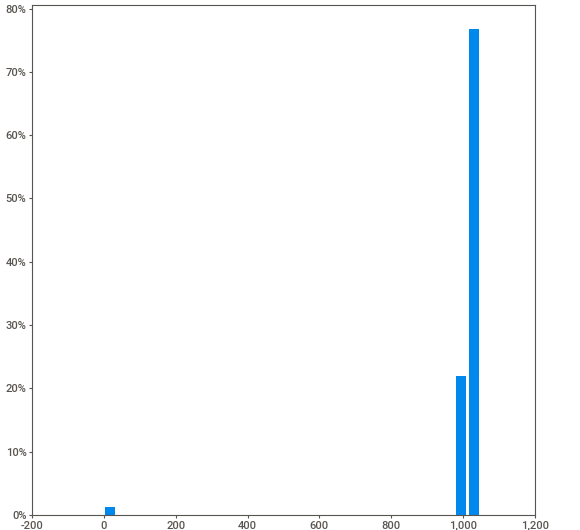
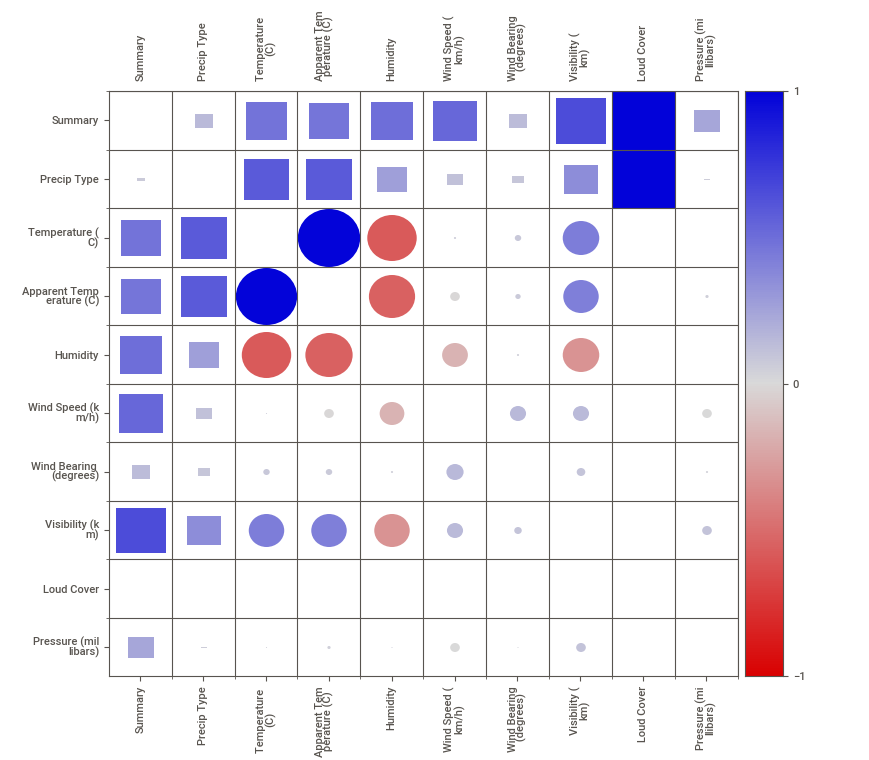
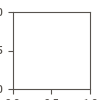

In [310]:
# doing basic eda
report = sv.analyze(df)
report.show_notebook()

We're gonna drop the following features:
- Formatted Date
- Loud Cover

In [311]:
df = df.drop(['Formatted Date', 'Loud Cover'], axis = 1)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


#### Handling Missing Values

In [312]:
# seeing missing values
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [313]:
df.shape

(96453, 10)

We've 96453 entries. We're gonna drop the 517 entries where the precip type is null.

In [314]:
df = df.dropna()

In [315]:
df.shape

(95936, 10)

In [316]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

All the missing values are now gone.

#### Handling Categorical Features

In [317]:
# extracting names of categorical features and seeing them
cat_feats = [feat for feat in df.columns if df[feat].dtype == 'O']
df[cat_feats].head(3)

,Summary,Precip Type,Daily Summary
0,Partly Cloudy,rain,Partly cloudy throughout the day.
1,Partly Cloudy,rain,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,Partly cloudy throughout the day.


##### Summary Feature

In [318]:
# seeing the unique categories and their count
values = df['Summary'].value_counts()
print('No. of cats:', len(values.index))
print('\nThe categories with their count \n', values)

No. of cats: 27

The categories with their count 
 Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                     

There are 27 different categories.

<Axes: xlabel='Summary'>

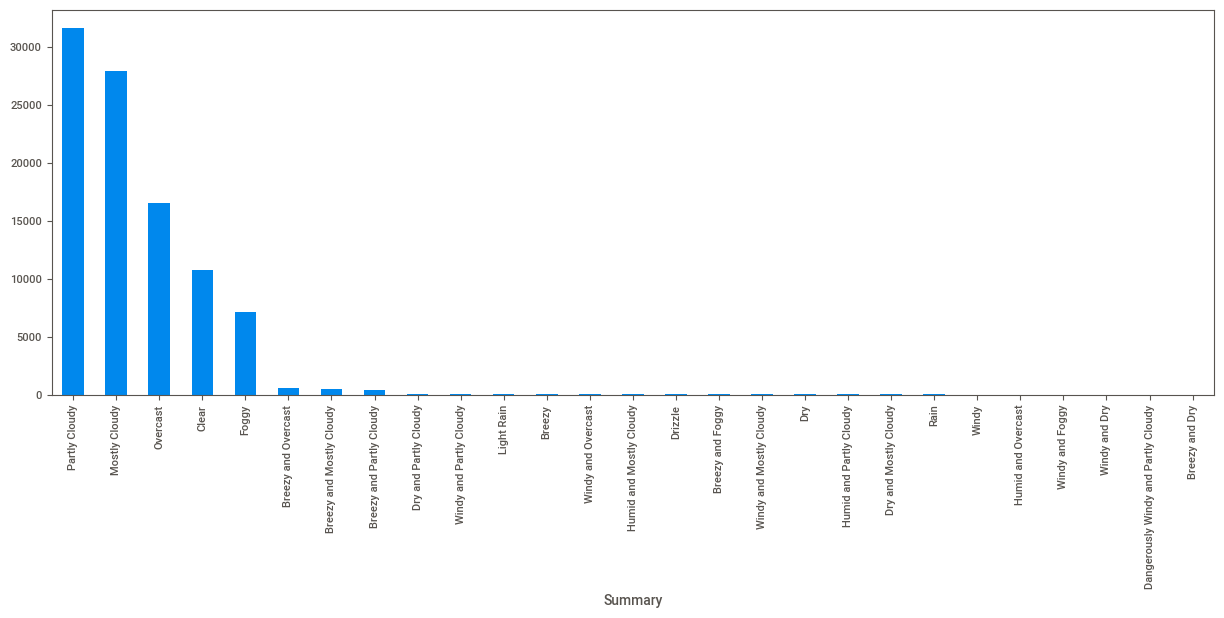

In [319]:
# visualizing the counts
values.plot.bar()

There are top 5 categories present more than 5000 times and others are present very less times. So, we're replacing all the other categories with a new label i.e. other

In [320]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [321]:
df['Summary']

0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
             ...      
96448    Partly Cloudy
96449    Partly Cloudy
96450    Partly Cloudy
96451    Partly Cloudy
96452    Partly Cloudy
Name: Summary, Length: 95936, dtype: object

In [322]:
# extracting names of top 5 categories based on their count
top_sumry_cats = list(dict(sorted(values.items(), key = lambda x: x[1], reverse = True)[:5]).keys())
# replacing other categories with 'other'
df['Summary'] = df['Summary'].apply(lambda x: x if x in top_sumry_cats else 'other')

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [323]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'other',
       'Clear'], dtype=object)

In [324]:
# doing one hot encoding for the categories
df = pd.get_dummies(df, columns=['Summary'], drop_first=True, dtype=int)
df.head(3)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0,0,0,1,0
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0,0,0,1,0
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0,1,0,0,0


##### Daily Summary Feature

In [325]:
# seeing the unique categories and their count
values = df['Daily Summary'].value_counts()
print('No. of cats:', len(values.index))
print('\nThe categories with their count \n', values)

No. of cats: 214

The categories with their count 
 Daily Summary
Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: count, Length: 214, dtype: int64


The feature provides similar information as the Summary feature was providing. So we're gonna drop this feature.

In [326]:
df = df.drop('Daily Summary', axis = 1)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,1,0
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,1,0
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,1,0,0,0
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,1,0
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,1,0,0,0


##### Precip Type Feature

In [327]:
# seeing the unique categories and their count
values = df['Precip Type'].value_counts()
print('No. of cats:', len(values.index))
print('\nThe categories with their count \n', values)

No. of cats: 2

The categories with their count 
 Precip Type
rain    85224
snow    10712
Name: count, dtype: int64


<Axes: xlabel='Precip Type'>

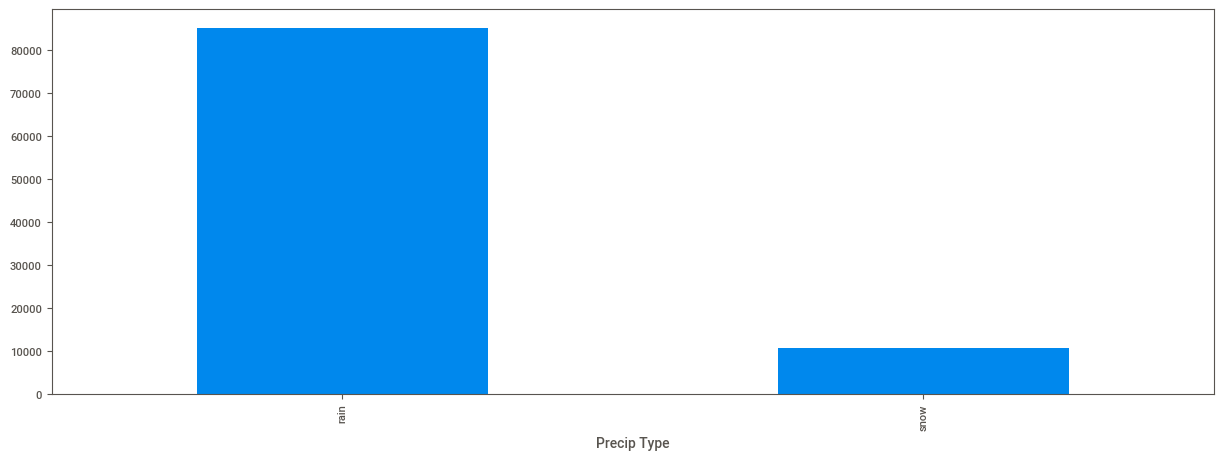

In [328]:
values.plot.bar()

In [329]:
# doing one hot encoding for the categories
df = pd.get_dummies(df, columns = ['Precip Type'], drop_first = True, dtype = int)
df.head(5)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,1,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,1,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,1,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,1,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,1,0,0,0,0


#### Scaling the features
We've data in different units so it is good to scale the independent features

In [330]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,1,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,1,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,1,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,1,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,1,0,0,0,0


In [331]:
len(df.columns[1:])

12

In [332]:
# importing library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaling features except Temperature as it is our target feature
x = pd.DataFrame(scaler.fit_transform(df.drop('Temperature (C)', axis = 1)), columns = df.columns[1:])

In [333]:
x.head(5)

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Foggy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_other,Precip Type_snow
0,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152,-0.283071,-0.640599,-0.456024,1.425689,-0.145579,-0.354531
1,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415,-0.283071,-0.640599,-0.456024,1.425689,-0.145579,-0.354531
2,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058,-0.283071,1.561039,-0.456024,-0.701415,-0.145579,-0.354531
3,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066,-0.283071,-0.640599,-0.456024,1.425689,-0.145579,-0.354531
4,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919,-0.283071,1.561039,-0.456024,-0.701415,-0.145579,-0.354531


In [334]:
y = df['Temperature (C)']
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

#### Doing train_test_split

In [335]:
# importing library
from sklearn.model_selection import train_test_split
# doing the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)

### Model Training & Evaluation

#### Using n_neighbors = 1

In [336]:
# importing library
from sklearn.neighbors import KNeighborsRegressor

# creating model using n_neighbors = 1 for now
model = KNeighborsRegressor(n_neighbors = 1)
# training the model
model.fit(x_train, y_train)
# making predictions
y_pred = model.predict(x_test)


In [337]:
# evaluating the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.round(np.sqrt(mse), 2)
print('Root mean squared error:', rmse, 'C')

Root mean squared error: 1.18 C


So, we got a root mean squared error 1.18 Centrigrade.

#### Trying multiple values of n_neighbors

In [338]:
rmse_rate = []

# for n_neighbors in [1, 5, 10, 15, 20]
for i in [1, 5, 10, 15, 20]:
  # new model creation
  model = KNeighborsRegressor(n_neighbors = i)
  # model training
  model.fit(x_train, y_train)
  # making predictions
  y_pred = model.predict(x_test)
  # calculating rmse
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.round(np.sqrt(mse), 2)
  # storing the rmse
  rmse_rate.append(rmse)

Text(0.5, 1.0, 'RMSE Analysis')

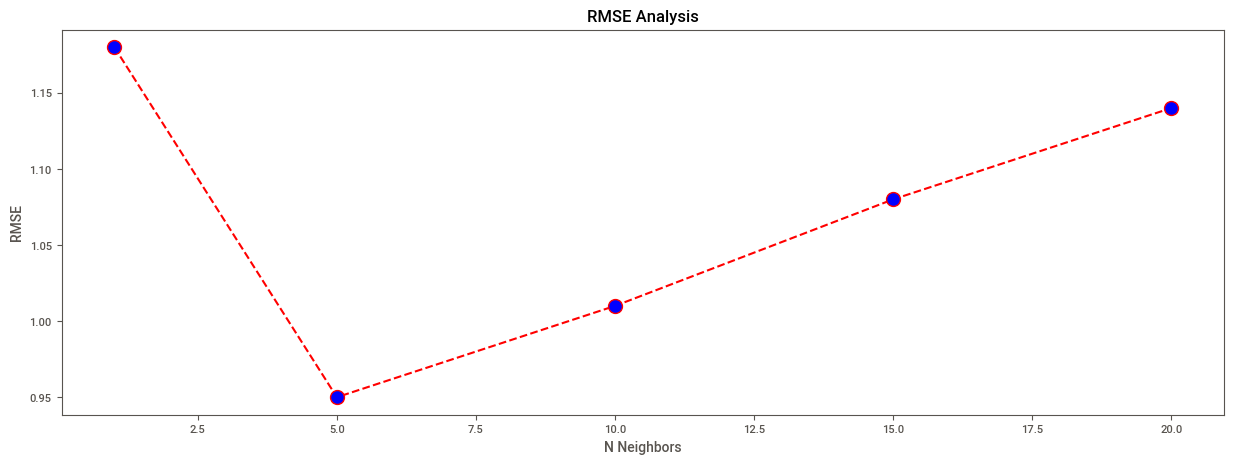

In [339]:
# visualizing the results
plt.plot([1, 5, 10, 15, 20], rmse_rate, color = 'red', markersize = 10, marker = 'o', linestyle = 'dashed', markerfacecolor = 'blue')
plt.xlabel('N Neighbors')
plt.ylabel('RMSE')
plt.title('RMSE Analysis')

For a n_neighbors value of 5, the rmse was the minimal

#### Training model with n_neighbors = 5

In [340]:
# importing library
from sklearn.neighbors import KNeighborsRegressor

# creating model using n_neighbors = 1 for now
model = KNeighborsRegressor(n_neighbors = 5)
# training the model
model.fit(x_train, y_train)
# making predictions
y_pred = model.predict(x_test)

In [341]:
# evaluating the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.round(np.sqrt(mse), 2)
print('Root mean squared error:', rmse, 'C')

Root mean squared error: 0.95 C


The rmse has decreased a lot i.e. from 1.8 C to 0.95 C